<h1 align='center'> CSI4106 - CSI4506: Introduction to Artificiel Inteligence </h1>
<h2 align='center'> Machine Learning for Music Genre Classification</h2>
<h3 align='center'> Project and Report </h3>
<h4 align='center'> Group 43 - 18 </h4>
<center><br>Nicolas Paré (7085541)<br>Jonathan Boerger (300098639)<br>Spencer Hayes-Laverdiere (8614154)</center>



<h3>TimeSheet</h3>

<p>****When you go put you stuff just fill the corresponding table data tags WRT the headers. If you need extra rows just copy and paste the set of tags bellow and update the rowspan attribute. Use "(<br>)" for newline****<br>
    
   <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>     
    
</p>


<table style="width:100%">
  <tr>
    <th>Team Member</th>
    <th>Task</th>
    <th>Hourst Spent</th>
    <th>Challenges</th>
  </tr>
  <tr>
    <td rowspan="3">Jonathan B.</td>
    <td>xxx</td>
    <td>yyy</td>
    <td>zzz</td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>
   <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td rowspan="3">Nicholas P.</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>
   <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>   
   <tr>
    <td rowspan="3">Spencer H.</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>
   <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>      
</table>


<style>
a:link {
  text-decoration: none;}
</style>

<style>
   
    
</style>    
<a id="top"></a>

<h3> Tabel of Content</h3>
<ol>
<li><a href='#intro'style="text-decoration: none">Introduction</a></li>
<li><a href="#dataset" style="text-decoration: none">The Dataset</a>
    <ol type ='a'>
    <li><a href="#features_extract" style="text-decoration: none">Preprocessing (feature extracsion)</a>
        <ol type ='i'>
        <li><a href="#ZCR" style="text-decoration: none"> Zero Crossing Rate</a></li>
        <li><a href="#spect_cent" style="text-decoration: none"> Spectral Centroid</a></li>
        <li><a href="#spect_ro" style="text-decoration: none"> Spectral Rolloff</a></li>
        <li><a href="#MFCC" style="text-decoration: none"> MFCC</a></li>
        <li><a href="#chroma" style="text-decoration: none"> Chroma Frequencies</a></li>
    </ol>
    <li><a href="#csv" style="text-decoration: none">CSV Creation and Data Formating</a></li>
        <ol type ='i'>
        <li><a href="#baseline_ext" style="text-decoration: none"> Baseline Data Extraction and Formating</a></li>
        <li><a href="#five_ft_ext" style="text-decoration: none"> Five Feature Data Extraction and Formating</a></li>
        <li><a href="#sample_baseline" style="text-decoration: none"> Sample Baseline Data</a></li>
        <li><a href="#sample_5ft" style="text-decoration: none">Sample Five Feature Data</a></li>
        </ol>    
    </ol>
</li>
  
<li><a href="#baseline" style="text-decoration: none">Baseline Model</a></li>
    <ol>
    <li><a href="#baseline_result"style="text-decoration: none">Baseline Model Results</a></li></ol>

<li><a href="#Improves" style="text-decoration: none">Improved Models</a>
    <ol type="a">
    <li><a href="#Improved_3ft" style="text-decoration: none">Three Feature Improved Model</a></li>
        <ol>
          <li><a href="#3_ft_result" style="text-decoration: none">Three Feature Result and Discussion</a></li></ol>  
    <li><a href="#Improved_5ft" style="text-decoration: none">Five Feature Improved Model</a></li>
        <ol>
          <li><a href="#5_ft_result" style="text-decoration: none">Five Feature Result and Discussion</a></li></ol>  
    </ol>    
 </li>
 <li>Five Feature Improved Model Hyperparameters Variation</li>
 <li>Analasys </li>
 <li>Conclusion</li>
 <li>Referenes</li>
 </ol>
    

<a id='intro'></a>
<h2 id="intro"> Introduction </h2>

///needs reworking//


For our project, we decided to do an in-depth understanding of a solution approach to an AI problem, with implementation and tests. The problem we wanted to solve is that of music genre classification. We wanted to create a baseline model, and change the features, hyperparameters, and amount of data that given to the model to see the effect different variations would have on the accuracy. To begin we researched different features that could be used as inputs into our network. We found an article that recommended the following five: zero-crossing rate, spectral centroid, spectral roll-off, Mel-Frequency Cepstral Coefficients (MFCC), chroma frequencies. These features can all be found from the short-time Fourier Transform (STFT) of the audio file, which, along with the features themselves, we will discuss in more detail throughout the notebook. The article also included a link to a well-known dataset called GTZAN which is used in many other music genre classification studies. GTZAN contains 1000 songs, separated evenly into ten different genres.  
  
The notebook is broken down into six parts. The first will explain how to decompose one song into the five desired features. It will also provide an in-depth explanation as to what the STFT of a song is, as well as what each feature represents. In part two we will extract and write into a CSV the waveform from all 1000 songs which will later be used to create our baseline model. For each song, we take a 5, 10, and 20-second sample and we will be comparing the results of these different input lengths later. In part three we perform the same task but instead of extracting the waveform into a CSV, we extract our five features for each of the 1000 songs. Part four involved creating the models and testing the input features. It is broken down into 3 subsections: the baseline, three features, and five feature inputs. Part five will cover variations on hyperparameters such as number of layers, width of each layer, etc. Finally in part six we will summarize and discuss the results achieved in each variation and compare them to our baseline.

https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

<a href="#top" style="text-decoration: none">Back to the top</a>

### Necessary Libraries
In order to run the following Notebook, the following libraries must first be installed:  
keras - https://keras.io/  
librosa - https://librosa.github.io/librosa/  
matplotlab - https://matplotlib.org/  
pandas - https://pandas.pydata.org/  
tensorflow (Requires Python 3.6) - https://www.tensorflow.org/  
  
To install, use the following commands:  
pip install keras  
pip install librosa  
pip install matplotlib  
pip install pandas  
pip install tensorflow

In [24]:
## Importing all necessary libraries
import librosa
import matplotlib.pyplot as plt
import librosa.display
import sklearn
import datetime
import keras
import statistics
import random
from random import randint
from random import seed
from keras import models
from keras import layers
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.collections import PolyCollection
import numpy as np
import csv
import pandas as pd
import math

<a id="dataset"></a>
<h2 id="dataset"> The Dataset</h2>
<br><br>
For the project we opted to use the GTZAN Genre Collection created by George Tzanetakis, a professeur at the University of Victoria. This dataset contains 1000 30-second songs split into 10 genres (100 songs in each genre). <br>
The dataset contains the song in its raw form, which is the standard fileformat for aufio files, with a sampling rates of 22050Hz. This means that a 30 second song is represnted by an array containing 661 500 indiviudal data points, where each data point is the amplitude of the signal.<br>
In the code section bellow, we are loading a song into the our signals analasys library and simply displaying the origional audio file in its raw form (figure 1), which is called a waveform.  

This song is 30 seconds long.
The sampling rate of this file is: 22050. It represents how many times per second the audio is sampled.
The value "x" represents the wave form of a song, which contains 661504 slices.
The approximate duration of the song is: 30.00018140589569. Which is what we expect since all songs are 30 seconds long.


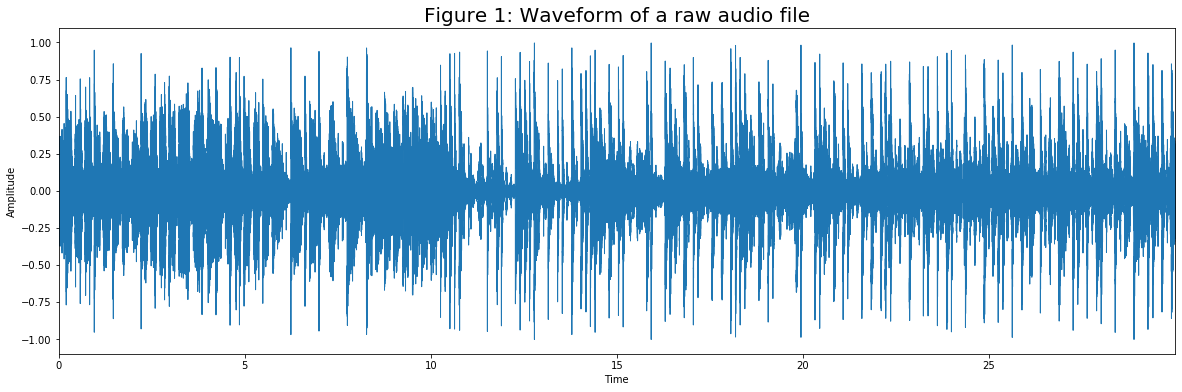

In [25]:
## Extracting the first song in the Hip Hop folder 

##### Step 1. Import the song file
print("This song is 30 seconds long.")
file_path = '../resources/genres/hiphop/hiphop.00000.wav'

## Load an audio file as a floating point time series.
x , sampling_rate = librosa.load(file_path)


print("The sampling rate of this file is: {0}. It represents how many times ".format(sampling_rate) +
      "per second the audio is sampled.")
print("The value \"x\" represents the wave form of a song, which contains {0} slices.".format(x.shape[0]))
print("The approximate duration of the song is: {0}. Which is what we expect since all songs are 30 seconds long.".format(len(x)/sampling_rate))

## Plot the waveform of the loaded file
plt.figure(figsize=(20, 6))
plt.title("Figure 1: Waveform of a raw audio file",fontdict={'fontsize':20})
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
librosa.display.waveplot(x, sr=sampling_rate)



<a href="#top" style="text-decoration: none">Back to the top</a>

<a id="features_extract"></a>
<h3 id="features_extract"> Feature Extraction (Dataset Preprocessing) </h3>

Recall that the dataset contains songs in their raw form, however, this representation of music does not provide enough information to be able to correctly and consitently classify the song's genre. Therfore, the data requires preprocessing before it can be used in the later stages of the project. <br>

This preprocessing takes the form of music feature extraction, which is signals processing with the intent of extracting unique identifying attributes out of the song such that it can be passed to the neural network. The following five features were selected to be extracted: zero corssing rate, spectral centroid, spectrall rolloff, mel-frequency cepstral coefficients (MFCC), and chroma frequencies. The characteristics will be further explained as well as illustrated graphially in following sections of the report. <br>

Throughout this portion of the project the python library librosa was used since it contains all relevant music oriented signals processing methods that were required.



<h4 id="spectrogram"> Spectrogram </h4>

Given that all the songs in the dataset are in their raw form, they must first be transformed into an alternate form which is more apt for feature extraction. This new form is the spectrogram which is simply a decomposition of all the component frequencies (over time) which combine to create the raw audio signal. <br>

The conversion of the raw song to the spectrogram was acheived by using the Short-Time Fourier Transrom(STFT). Specifically by running the librosa.stft() function.
  
The STFT breaks down a signal into amplitude over time of each frequency. To demonstrate this more clearly, Figure 1 below shows a 3D spectrogram example from Wikipedia. To explain it more clearly, we'll take an example of a sound recording. The frequency axis represents all the possible frequencies in that recording. The time axis represents different times in the recording. The z or amplitude axis represents the amplitude (or level) of sound.

In the Figure, we can see that the amplitude of the low frequencies is also low. As the frequency gets higher, the amplitude also increases, meaning this recording was of a higher pitched sound.

The plots in the next section represent the same thing as Figure 1 and have the same frequency and time axis. However, instead of a third dimension for amplitude, they uses colour to show higher amplitudes across the 2D plane. 
<br>
<br>
<center style="font-size:20px">Figure 2: Generic Spectrogram</center>

![Spectrogram.png](attachment:Spectrogram.png)

(Figure 2 Source:https://en.wikipedia.org/wiki/Spectrogram?fbclid=IwAR0Pzq_aS1hJtt-eEZxJyE1cZa6pEEKzYQBlhYer8x4CUOvHr_fOPkg89A8#/media/File:Spectrogram.png)

The following section of code demonstrates the transformation of the waveform into a spectrogram. Additionally it also show a 2D and multiple 3D representation of the spectrogram of the waveform illustrated in figure 1.

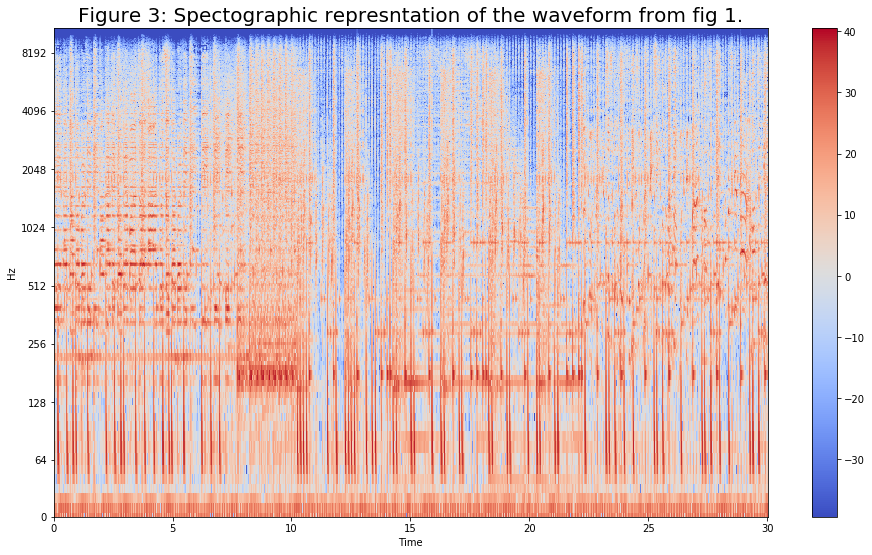

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


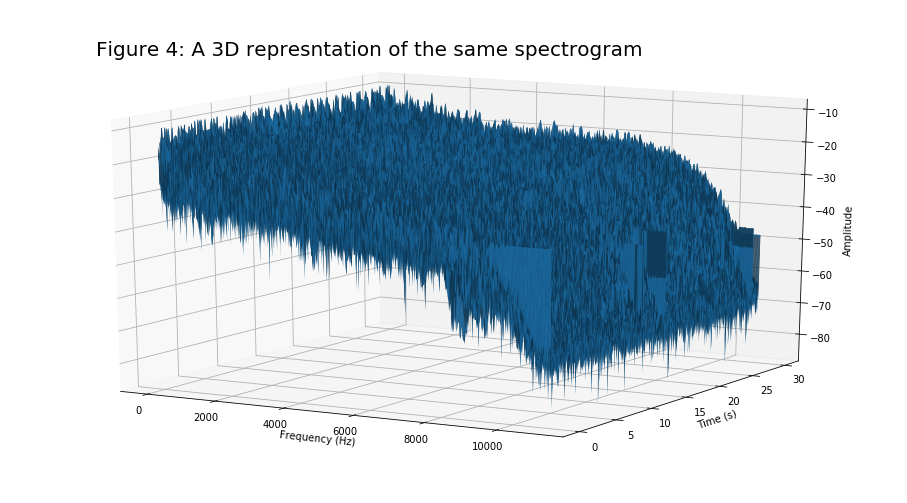

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


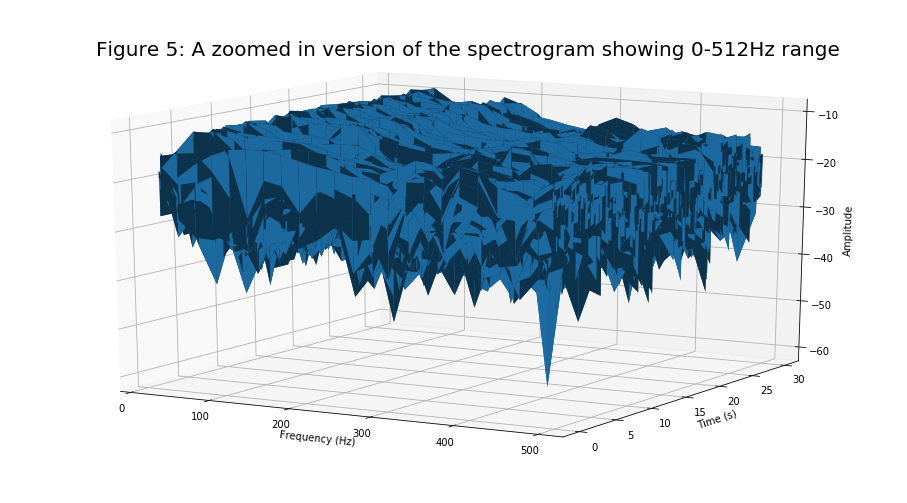

In [17]:
##### Apply Short-Time Fourier Transform (STFT) to Decompose Wave Form to base frequencies

## This function converts our file into a time-frequency domain representation using short-time Fourier transform 
## (essentially this is the change of FFT's over time)
wav_form = librosa.stft(x)
S_spectogram, phase_spectogram = librosa.magphase(librosa.stft(y=x))

## Plot the spectrogram of the STFT representation
wav_form_db = librosa.amplitude_to_db(abs(wav_form))
plt.figure(figsize=(16,9))
plt.title("Figure 3: Spectographic represntation of the waveform from fig 1.",fontdict={'fontsize':20})
plt.xlabel("Time(s)")
plt.ylabel("Frequency(Hz)")
librosa.display.specshow(wav_form_db, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()
plt.ion()



##Ploting the 3D represenation spectrogram of the SFTF 
f, t, Zxx = signal.stft(x, sampling_rate, nperseg=1025)
Zxx=abs(Zxx)


fig = plt.figure(figsize=(16,9))
librosa.display.specshow(wav_form_db, sr=sampling_rate, x_axis='time', y_axis='log')
ax = fig.gca(projection='3d')
ax.text2D(0.1, 0.9, "Figure 4: A 3D represntation of the same spectrogram",fontdict={'fontsize':20}, transform=ax.transAxes)
ax.plot_surface(f[:, None], t[None, :],10.0*np.log10(Zxx),rcount=2046, ccount=2046,)
ax.view_init(15, -60)
ax.set_ylabel('Time (s)')
ax.set_xlabel('Frequency (Hz)')
ax.set_zlabel('Amplitude')

plt.show()

##Ploting the 3D represenation spectrogram of the SFTF in the frequence range of 0-512
myfilter = (f>000) & (f<512)
f = f[myfilter]
Zxx = Zxx[myfilter, ...]

fig = plt.figure(figsize=(16,9))
librosa.display.specshow(wav_form_db, sr=sampling_rate, x_axis='time', y_axis='log')
ax = fig.gca(projection='3d')
ax.text2D(0.1, 0.9, "Figure 5: A zoomed in version of the spectrogram showing 0-512Hz range",fontdict={'fontsize':20}, transform=ax.transAxes)
ax.plot_surface(f[:, None], t[None, :],10.0*np.log10(Zxx),rcount=2046, ccount=2046,)
ax.view_init(15, -60)
ax.set_ylabel('Time (s)')
ax.set_xlabel('Frequency (Hz)')
ax.set_zlabel('Amplitude')

plt.show()


When considering figure 3, it is as if one is looking at figure 2 in a top down view, where the color gradient represents the amplitude for any given time and frequency.

Figure 4 cleary illustrates the amplitude trends for figure 3. In the lower frequency range it has higher amplitude (red) and at the upper freuquencies it has lower amplitude (blue).

Figure 5 is showing a zoomed in version of figure 4 constrained to the frequency range of 0-512Hz. Additionally the large blue spike corelates to the deep blue spot on figure 3 at (~6 sec, 500 Hz).


<a href="#top" style="text-decoration: none">Back to the top</a>

<a id="ZCR"></a>
<h4 id="ZCR"> Zero Crossing Rate </h4>

The first feature to be extracted is the zero crossing rate (ZCR). The ZCR actually comes from the waveform, and it represents the number of times the signal cross the 0-amplitude (x-axis). 

In the code section bellow, the ZCR is calculated for a miniscule portion of the song. The example bellow (figure 6) represents 4.5 millisecond frame or 100 slices (recall that a song is sampled 22050 times in a second, so a slice is a singular sampeling).

The song snippet in figure 6 has a ZCR of 15, whereas the entire song has a ZCR of 97628.

From the image below which represents a small slice of time. The number of crossings 0 is 15 



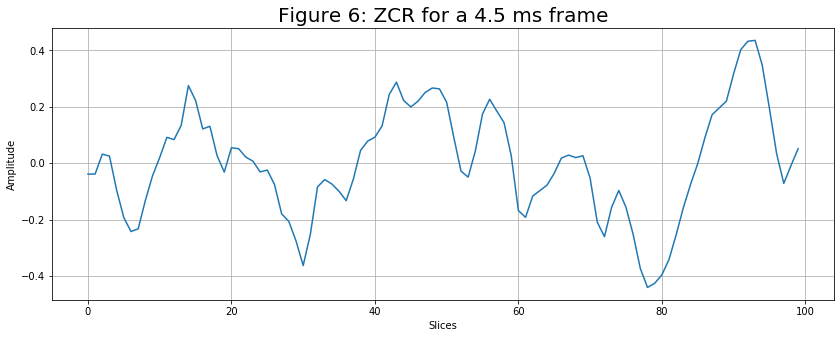

In [9]:
# Feature 1: Zero-Crossing Rate 
## This represents how many times the frequency passes the "0" x-axis in either negative or positive direction
m0 = 10000
m1 = 10100
plt.figure(figsize=(14,5))
plt.title("Figure 6: ZCR for a 4.5 ms frame",fontdict={'fontsize':20})
plt.xlabel("Slices")
plt.ylabel("Amplitude")
plt.plot(x[m0:m1])
plt.grid()
zero_crossing_sample = librosa.zero_crossings(x[m0:m1], pad=False)
print("From the image below which represents a small slice of time. The number of crossings " +
     "0 is {0} \n".format(sum(zero_crossing_sample)))

In [10]:
# Zero Crossing feature applied to entire song
zero_crossings = librosa.zero_crossings(x, pad=False)
print("When this idea of zero crossings is extended to the entire 30 second portion of a song, this song has " + 
      "{0} zero crossings".format(sum(zero_crossings)))

When this idea of zero crossings is extended to the entire 30 second portion of a song, this song has 97628 zero crossings


<a href="#top" style="text-decoration: none">Back to the top</a>

<a id="spect_cent"></a>
<h4 id="spect_cent"> Spectral Centroid </h4>

The second feature, the spectral centroid, calculates the average 'power' of all the frequencies for that given point in time which the slice represents. When the spectral is calculated for the entire song the result is a smooth curve over the entire spectrogram or waveform. Generally speaking different genres will have different spectral centroid values. 

In the code section bellow, the spectral centroid is calculated over 100 000 slices or a song snippet of ~4.5 seconds long. The resultant curve is ploted over its corresponding waveform (figure 7) and spectrogram (figure 8).

Of note, librosa.feature.spectral_centroid() returns an array of values in Hz, therefore to plot over a waveform the values were normalized. 

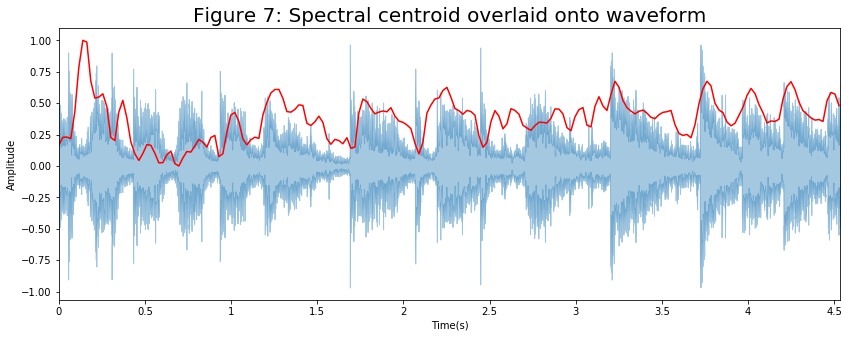

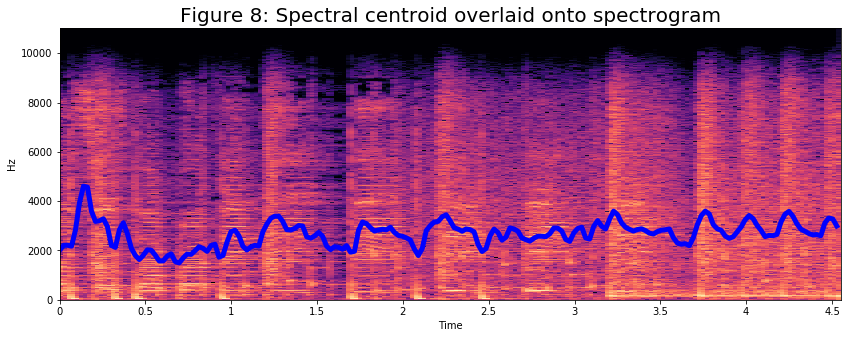

In [11]:
# Feature 2: Spectral Centroid 
## This feature represents taking a "slice" of a song and then taking the average of all frequencies at the
## point in time the slice represents. Extend this idea to ALL slices that make up a song, and
## using these averages plot a line that traverses exactly through each point, this is the Spectral Centroid
## of a song. This is important because two different genres may "generally" have a different spectral centroid line.

# Smaller Sample taken for demonstration below
n0 = 100000
n1 = 200000
x_sample = x[n0:n1]

spectral_centroids_sample = librosa.feature.spectral_centroid(x_sample, sr=sampling_rate)[0]
spectral_centroids_sample.shape

frames = range(len(spectral_centroids_sample))
t = librosa.frames_to_time(frames)

# Normalize
def normalize(x_sample, axis=0):
    return sklearn.preprocessing.minmax_scale(x_sample, axis=axis)
plt.figure(figsize=(14,5))
librosa.display.waveplot(x_sample, sr=sampling_rate, alpha=0.4)
plt.title("Figure 7: Spectral centroid overlaid onto waveform",fontdict={'fontsize':20})
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.plot(t, normalize(spectral_centroids_sample), color='r')


S_sample, phase_sample = librosa.magphase(librosa.stft(y=x_sample))
plt.figure(figsize = (14,5))
plt.title("Figure 8: Spectral centroid overlaid onto spectrogram",fontdict={'fontsize':20})
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
librosa.display.specshow(librosa.amplitude_to_db(S_sample, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_centroids_sample, lw = 5.0, color='b')

In [12]:
# Full song taken as spectral_centroid

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sampling_rate)[0]

<a href="#top" style="text-decoration: none">Back to the top</a>

<a id="spect_ro"></a>
<h4 id="spect_ro"> Spectral Rolloff </h4>

The third feature, spectral rolloff is simmilar to the spectral centroid. However instead of calculating the average power of a slice, it takes the sum of all the power for the frequencies in the slices and then it calculates when/where it reaches 85% (for example) of that sum on the spectrum. The %-value can vary, however the standard value is 85%.

As an examples, lets say a given slice has frequency distribution of 0-100Hz and each Hz has 1% of the sum total of the power for that slice. Therfore when calculating the spectrall rolloff at 85% for this slice the result will be 85Hz.


In the code section bellow, the spectral rolloff is calculated over the entire 30 second song at various rolloff percentages and then displayed over waveform and spectrogram (logarithmic and linear scale).

Simmilar to spectral centroid, librosa.feature.spectral_rolloff() also returns an array of values in Hz, therefore to plot over a waveform the values were again normalized. 

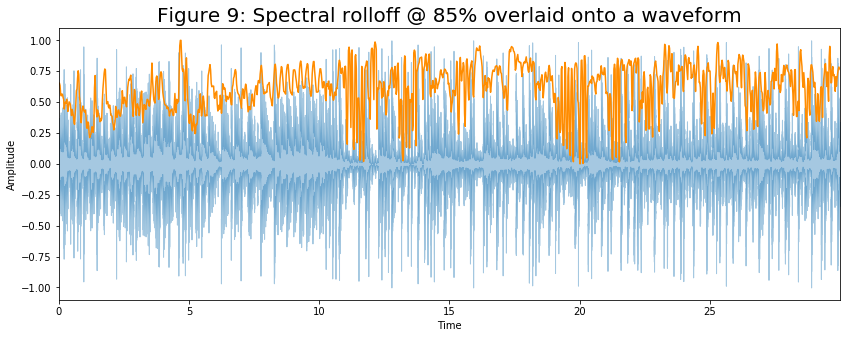

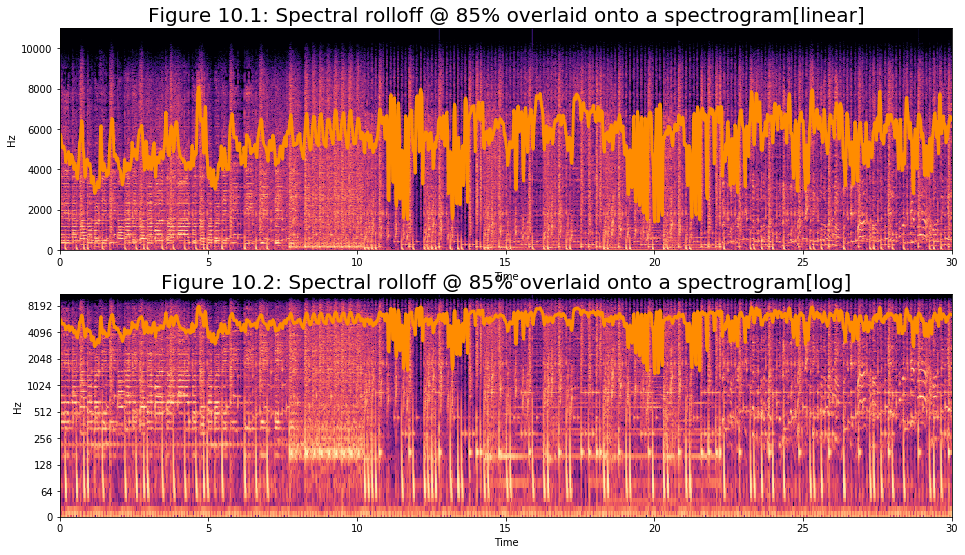

In [13]:
# Feature 3: Spectral Roll-off
## For a single slice of the stft the total "Energy" of all frequencies the it is composed of is always equal
## to "100%". Spectral-Roll off finds the frequency at which a certain given percentage of the energy is. For
## example, the Spectral Roll-Off at 85% of a song might be at 6000Hz. To find this value, it adds these composite
## frequencies in order of lowest frequencies in terms of Hz, to higher frequencies. This approach is applied to the
## entire song at each slice which ends up creating a series of points on a graph that are joined together by a line
## passing directly through all points to create the Spectral Roll-off.

## Spectral Roll Percent at 85% 

spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.85)[0]

frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(14,5))
plt.title("Figure 9: Spectral rolloff @ 85% overlaid onto a waveform",fontdict={'fontsize':20})
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='darkorange')


plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
plt.title("Figure 10.1: Spectral rolloff @ 85% overlaid onto a spectrogram[linear]",fontdict={'fontsize':20})
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=3)
plt.subplot(2,1,2)
plt.title("Figure 10.2: Spectral rolloff @ 85% overlaid onto a spectrogram[log]",fontdict={'fontsize':20})
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=3)
plt.show()

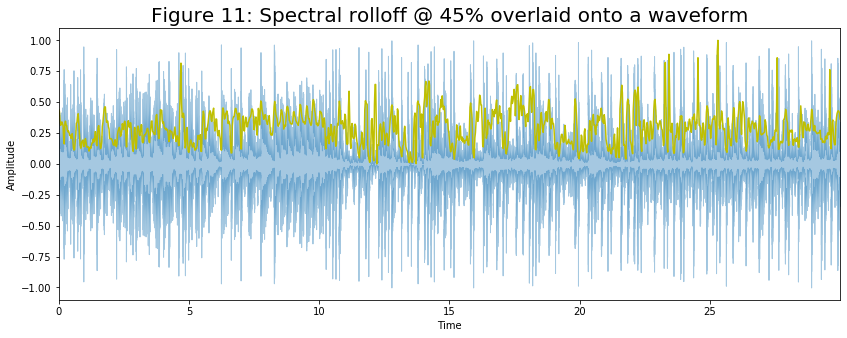

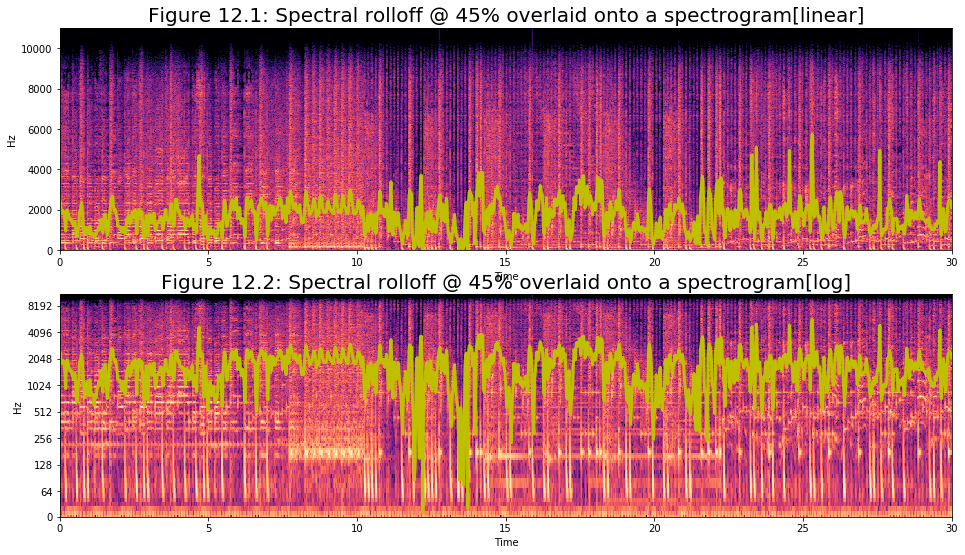

In [14]:
## Spectral Roll Percent at 45%
spectral_rolloff_2= librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.45)[0]
plt.figure(figsize=(14,5))
plt.title("Figure 11: Spectral rolloff @ 45% overlaid onto a waveform",fontdict={'fontsize':20})
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff_2), color='y')

plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
plt.title("Figure 12.1: Spectral rolloff @ 45% overlaid onto a spectrogram[linear]",fontdict={'fontsize':20})
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff_2, color='y', lw=3)
plt.subplot(2,1,2)
plt.title("Figure 12.2: Spectral rolloff @ 45% overlaid onto a spectrogram[log]",fontdict={'fontsize':20})
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff_2, color='y', lw=3)
plt.show()

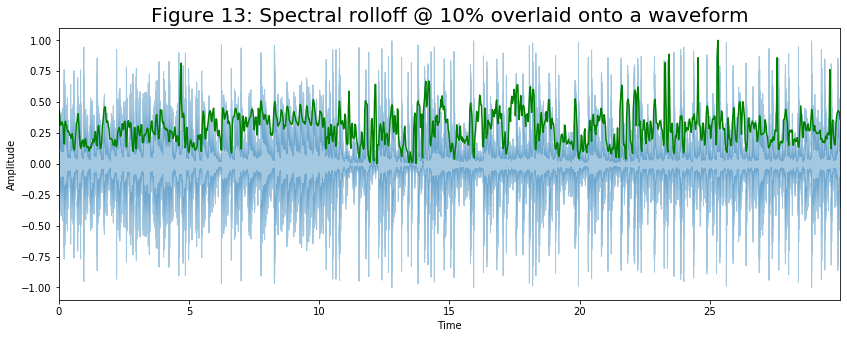

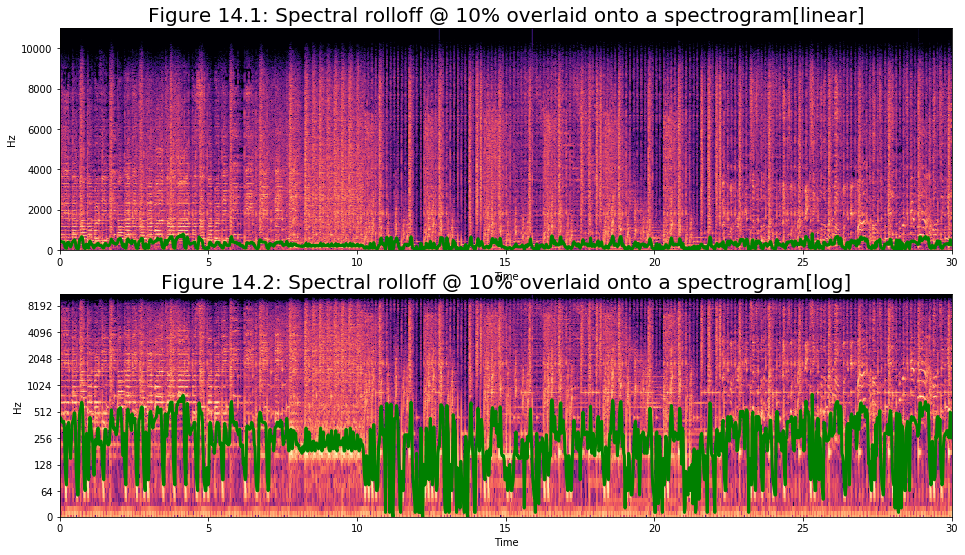

In [15]:
## Spectral Roll Percent at 10%
spectral_rolloff_3= librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.1)[0]
plt.figure(figsize=(14,5))
plt.title("Figure 13: Spectral rolloff @ 10% overlaid onto a waveform",fontdict={'fontsize':20})
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff_2), color='g')

plt.figure(figsize = (16,9))

plt.subplot(2,1,1)
plt.title("Figure 14.1: Spectral rolloff @ 10% overlaid onto a spectrogram[linear]",fontdict={'fontsize':20})
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff_3, color='g', lw=3)
plt.subplot(2,1,2)
plt.title("Figure 14.2: Spectral rolloff @ 10% overlaid onto a spectrogram[log]",fontdict={'fontsize':20})
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff_3, color='g', lw=3)
plt.show()

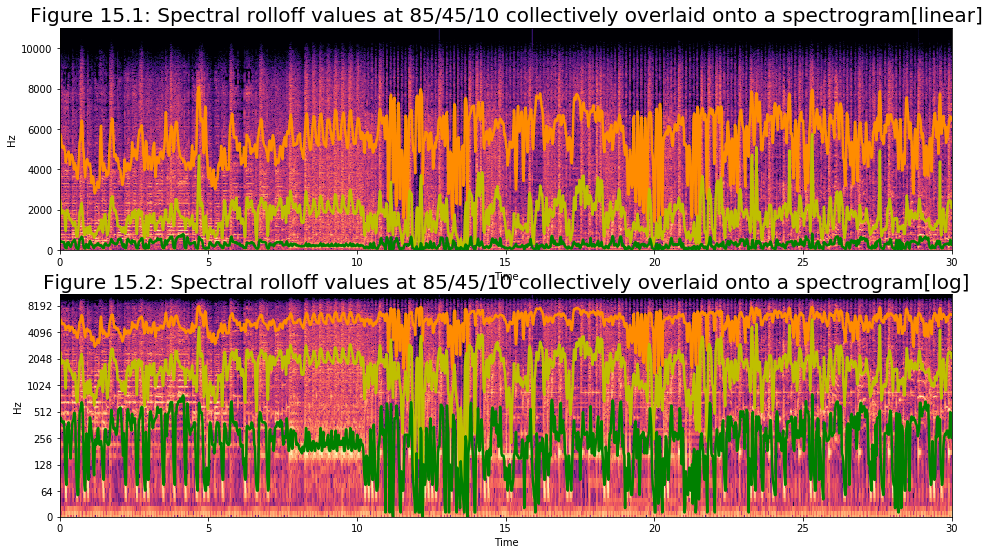

In [16]:
#Plotting the 3 different rolloffs percentages on the same graph both on a linear hz scale and a log hz scale
plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
plt.title("Figure 15.1: Spectral rolloff values at 85/45/10 collectively overlaid onto a spectrogram[linear]",fontdict={'fontsize':20})
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=2.5)
plt.plot(t,spectral_rolloff_2, color='y', lw=2.5)
plt.plot(t,spectral_rolloff_3, color='g', lw=2.5)
plt.subplot(2,1,2)
plt.title("Figure 15.2: Spectral rolloff values at 85/45/10 collectively overlaid onto a spectrogram[log]",fontdict={'fontsize':20})
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=2.5)
plt.plot(t,spectral_rolloff_2, color='y', lw=2.5)
plt.plot(t,spectral_rolloff_3, color='g', lw=2.5)
plt.show() 

For figures 9 though 15, the spectrall rolloff is being calculated for the same song each time, however with different rolloff percentages. Fiure 15 highlights especially well the impact of changing the rolloff percentange and how lower the percentages the lower the line is drawn of the spectrogram. 

<a href="#top" style="text-decoration: none">Back to the top</a>

<a id="MFCC"></a>
<h4 id="MFCC"> MFCC </h4>

The fourth feature, mel-frequency cepstral coefficients (MFCC) is used to indetify the lingustic component of an audio signal and models the human voice. 

An audio signal will be distributed into 20 distinct bins, each representing a seperate MFCC coeeficents, where the value of the bin represents the power mel-spectrum. That is to say there is 20 distinct data points for each slice.  

In the code section bellow, the MFCC is calculated over the entire 30 second song and displayed in figure 16. In the figure the 20 bins are distinctly visible as horizontal bans. 

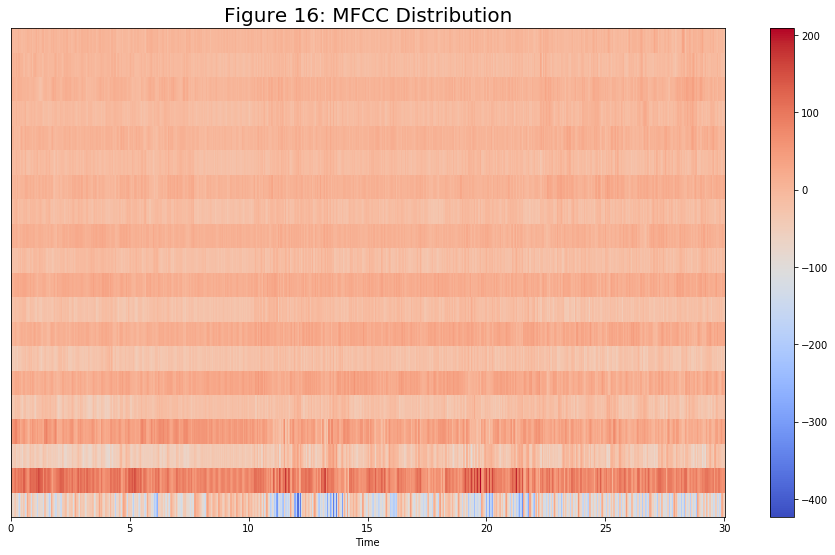

In [21]:
# Feature 4: Mel-Frequency Cepstral Coefficients (MFCC)
## This feature represents:This feature is a way to represent human auditory sounds

mfccs = librosa.feature.mfcc(x, sr=sampling_rate)

plt.figure(figsize=(16,9))
plt.title("Figure 16: MFCC Distribution",fontdict={'fontsize':20})
plt.xlabel("Time(s)")
plt.ylabel("Bins")
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')
plt.colorbar()


<a href="#top" style="text-decoration: none">Back to the top</a>

<a id="chroma"></a>
<h4 id="chroma"> Chroma Frequencies </h4>

The last feature is the chroma frequencies where the audio signal is projected into 12 bins representing the 12 disctinct semitiones of a musical octave (C, C#, D, D#, E, F, F#, G, G#, A, A#, B). The value associated with each bin represnets the relative power for the semitone for the given slice; and each slice will be represented by 12 values. 

Although it is possible to increase the number of bins to encompas multiple octaves, this is uncessary since notes which are exactly an octave appart are perceived very similarly regardless of the base frequency. 



In the code section bellow, the chroma frenquencies are calculated over the entire 30 second song and displayed in figure 17. In the example bellow it is clear that the first note of the song is primarily composedof the E and G semitone. 

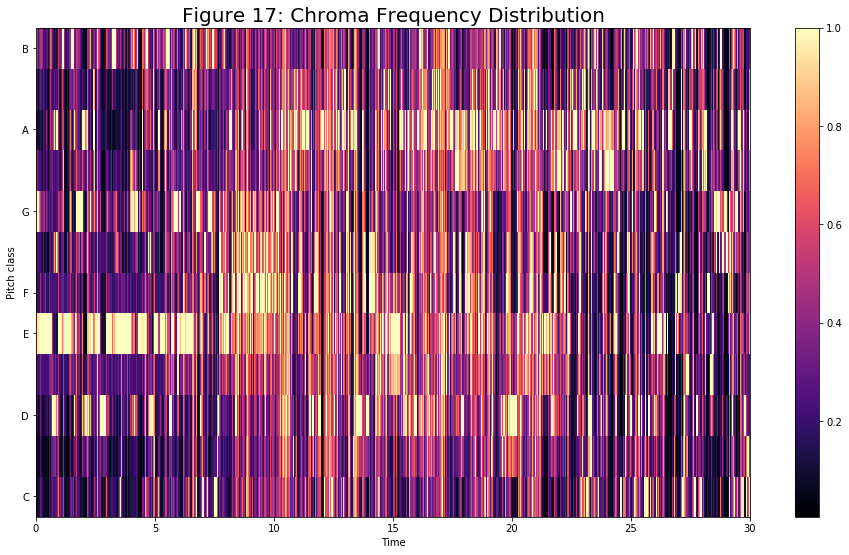

In [31]:
# Feature 5: Chroma Frequencies
## This feature represents: This will will divide the spectrum in to 12 distinct semitones that represent that
## represent a musical octave, for the entire song.

chromagram = librosa.feature.chroma_stft(x, sr=sampling_rate )
plt.figure(figsize=(16,9))
plt.title("Figure 17: Chroma Frequency Distribution",fontdict={'fontsize':20})
plt.xlabel("Time(s)")
plt.ylabel("Semitones")
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma')
plt.colorbar()




<a href="#top" style="text-decoration: none">Back to the top</a>

<a id="csv"></a>
<h3 id="csv"> CSV Creation and Data Formating</h3>

The previous section detailled the various music features to be extracted and demonstrated the implemnation on one song. In the following section the feature extraction will be apllied onto all 1000 songs. The extracted feature data when then be passed to a CSV file for storage and easy manipulation in later portions of the project. 

There are two sets of CSV files created in this section, the extracted features for the baseline model and the extracted features for the improved models. Additonally the feature extraction and CSV creation is done for the 5, 10 and 20 second extraction, resulting in the creation of two set of 3 CSV files. [These files are contained in the source folder, therfore it is not required to run the following section as it is time consuming]. 

<a id="baseline_ext"></a>
<h4 id="csv_base"> Baseline Data Extraction and Formating</h4>

The following section of code defines all the functions required to generate the CSV files, extract the data from the raw audio files and then storing it into the CSV files. 

With regards to the baseline model, the data being extrated is the mean amplitude of the waveform at 512 slice interval (2 msec). The rational for this extraction will be further explained in the <a href="#baseline" style="text-decoration: none">baseline</a> section of the report.



In [32]:
## baseline_waveform_512_subset extracts the waveform of each song. To do so, it loads the song and then takes the average
## value for every 512 sample points and creates one point for them, thus compressing the sample to a more manageable size.
## It is possible to simply take a different sampling rate by passing the parameter to the load() function, however, we
## wanted to know exactly how it was being resampled and there is limited documentation about resampy's ‘kaiser_best’.
## After compressing, we add the new sample point to the list wave_form_downsize and continue iterating through until the
## entire song has been sampled.

def baseline_waveform_512_subset(songFilePath,startTime,duration):
    x , sampling_rate = librosa.load(songFilePath, offset= startTime, duration=duration)
    wave_form_downsize = []
    start_point = 0

    for i in range (0,(math.floor(x.shape[0]/512))):
        sum_512=0.0
        for j in range (start_point, start_point + 512):
            sum_512+=x[j]
        wave_form_downsize.append(float(sum_512/512))
        start_point+=512
    return wave_form_downsize
    

## Create a csv file into which the sampled waveform will be written. The file will include a column for the filename,
## genre, and each of the sampled values.
def csvCreatorBaseline (file_name,size):
    header_elements =["filename "]
    for l in range (1, size+1):
        header_elements.append(f' waveform slice {l}')
    header_elements.append('genre')
    file = open(file_name,'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header_elements)
        
## CSV Appendor Method for adding the extrated music feautres to the CSV File. Appends the sampled values into the CSV
## file.
def csvAppendorBaseline (csvFile_name, waveform_512_split, song_file_path, genre):
    to_append =f'{song_file_path}'
    to_append += " "
    for i in range(0,len(waveform_512_split)):
        to_append += str(waveform_512_split[i])
        to_append +=" "
    to_append += " "
    to_append += genre
    file = open(csvFile_name, 'a', newline='')  
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())
        

The following section of code applies the previous methods to all 1000 songs at the 5, 10 and 20 secconds durations. A counter is included to show the progress of the extraction. 

In [12]:
## Calculates how many sample points each file will have. The number of sample points will depend on the length of the
## sample chosen and we have decided to take 5, 10, and 20 second samples of each song in order to compare how they 
## perform. Since each is sampled at the same rate, the longer samples will have more points.
second_5=math.floor((5*22050)/512)
second_10=math.floor((10*22050)/512)
second_20=math.floor((20*22050)/512)

## Call the csvCreatorBaseline method to generate 3 different CSV files, one for each sample length.
csvCreatorBaseline("baseline_5sec.csv",second_5)
csvCreatorBaseline("baseline_10sec.csv",second_10)
csvCreatorBaseline("baseline_20sec.csv",second_20)

## Create a list of the 10 genres in the dataset to iterate through
genres = ["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]

file_path_b='../resources/genres/'

## Iterate through the list of genres and for each one, open the folder containing its songs and for every song,
## create a 5, 10, and 20 second sample and write those samples into their respective CSV file.
print("Start")
count=0
for x in genres:
    file_path_g= file_path_b + x +'/'+x +'.000'

    for y in range(0, 100):
        y_string = str(y)
        file_path_s = file_path_g + y_string.rjust(2,'0') + '.wav'
        
        #extracting baseline from 5 seconds
        baseline_512_split_5= baseline_waveform_512_subset(file_path_s,12.5,5)
        csvAppendorBaseline("baseline_5sec.csv",  baseline_512_split_5,file_path_s[file_path_s.rfind('/')+1:], x)
        
        #extracting baseline from 10 seconds
        baseline_512_split_10= baseline_waveform_512_subset(file_path_s,10,10)
        csvAppendorBaseline("baseline_10sec.csv",  baseline_512_split_10,file_path_s[file_path_s.rfind('/')+1:], x)
        
        #extracting baseline from 20 seconds
        baseline_512_split_20= baseline_waveform_512_subset(file_path_s,5,20)
        csvAppendorBaseline("baseline_20sec.csv",  baseline_512_split_20,file_path_s[file_path_s.rfind('/')+1:], x)
        if count%100 == 0:
            print(count)
        count+=1
                
        
print("End")

Start
0
100
200
300
400
500
600
700
800
900
End


<a href="#top" style="text-decoration: none">Back to the top</a>
<a id="five_ft_ext"></a>
<h4 id="csv_feat"> Five Feature Data Extraction and Formating</h4>

The following section of code defines all the functions required to generate the CSV files, extract the feature data from the spectogram and store it in the CSV. 

With regards to the inproved models, the data being extrated are the features previously detailed. As with the baseline data extraction, the data values for the five features are beeing calculated every 2 msec(or every 512 slices). Since an audio file is not constantly changing (to allow for the brain to hear and process the sound), calculating the values at 512 slice intervals is perfectly accetable while avoiding having an overly large amount of data (861 data points instead of 441 000 data points to represent a 20 second song snippet). 

Additionally, each of the 20 MFCC bins and the 12 chroma frequencies are treated as a seperate data points. Therfore the 5 features become 35 distinct data types, which creates a 2d matrix of size 35 x {215,430,861} (at 5, 10 , 20 seconds) for each song. 

In order to make the CSV data tables more managable and have consitent size CSV files regardless of the length of the song the intermeditary results were compressed into a singular datapoint for each daty type. This was acheived by taking the mean of all
{215,430,861} data points resulting in a simple array of length of 35 to represent one song. 

Lastly, it is possible to specify a specific roll off percentage for the spectral rolloff; nevertheless the normal 85% value was used for the project.


In [ ]:
## Create a csv file into which the 5 features will be written. The file will include a column for the filename,
## genre, and clomuns for all the features. 

def csvCreatorFiveFeat (file_name):
    header_elements =["filename ", "spectral_centroid ",  "rolloff ", "zero_crossing_rate"]
    pitch = ["c", "c#", "d", "d#","e", "f", "f#", "g", "g#", "a", "a#", "b"]
    header=''
    for l in range (1, 21):
        header_elements.append(f' mfcc{l}')
    for i in range (1,13):
        header_elements.append(f"chroma_pitch_{pitch[i-1]}") 
    header_elements.append('genre')
    file = open(file_name,'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header_elements)


        
## CSV Appendor Method for adding the extrated music feautres to the CSV File. It takes as input each of the features
## as well as the name of the CSV file they will be added to, and then appends each.
def csvAppendor (csvFile, zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, song_file_path, genre):
    to_append =f'{song_file_path} {np.mean(spectral_centroids)} {np.mean(spectral_rolloff)} {sum(zcr)}'   
    for e in mfccs:
        to_append += f' {np.mean(e)}'
    for h in chroma:
        to_append += f' {np.mean(h)}'
    to_append += " "
    to_append += genre
    file = open(csvFile, 'a', newline='')  
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())



## Feature Extraction Method. The location of the song file is determined by songFilePath and the sample is taken
## from startPoint and has a length determined by duration. rollPercent represents the percentage at which we want
## to calculate the spectral rolloff, as explained earlier in this notebook.

def featureExtractor (songFilePath, startTime, duration,rollPercent):
    x , sampling_rate = librosa.load(songFilePath, offset= startTime, duration=duration)
    zcr = librosa.zero_crossings(x)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sampling_rate)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=rollPercent)[0]
    mfccs = librosa.feature.mfcc(x, sr=sampling_rate)
    chroma = librosa.feature.chroma_stft(x, sr=sampling_rate)
    
    return zcr, spectral_centroids, spectral_rolloff, mfccs, chroma

The following section of code applies the previous methods to all 1000 songs at the 5, 10 and 20 secconds durations. A counter showing the genre is included to show the progress of the extraction. 

In [54]:
## Call the csvCreatorFiveFeat function to create the CSV files for the 5, 10, and 20 second samples

csvCreatorFiveFeat('feature_extraction_5sec.csv')
csvCreatorFiveFeat('feature_extraction_10sec.csv')
csvCreatorFiveFeat('feature_extraction_20sec.csv')


## Create a list of the 10 genres in the dataset to iterate through
genres = ["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]

file_path_b='../resources/genres/'

## Iterate through the list of genres and for each one, open the folder containing its songs and for every song,
## create a 5, 10, and 20 second sample and write those samples into their respective CSV file.
print("Start")
for x in genres:
    file_path_g= file_path_b + x +'/'+x +'.000'

    for y in range(0, 100):
        y_string = str(y)
        file_path_s = file_path_g + y_string.rjust(2,'0') + '.wav'
        
        #extracting features from 5 seconds
        zcr, spectral_centroids, spectral_rolloff, mfccs, chroma = featureExtractor(file_path_s, 12.5,5,0.85)
        csvAppendor('feature_extraction_5sec.csv',zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, file_path_s[file_path_s.rfind('/')+1:], x)
         #extracting features from 10 seconds
        zcr, spectral_centroids, spectral_rolloff, mfccs, chroma = featureExtractor(file_path_s, 10,10,0.85)
        csvAppendor('feature_extraction_10sec.csv',zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, file_path_s[file_path_s.rfind('/')+1:], x)
         #extracting features from 10 seconds
        zcr, spectral_centroids, spectral_rolloff, mfccs, chroma = featureExtractor(file_path_s, 5,20,0.85)
        csvAppendor('feature_extraction_20sec.csv',zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, file_path_s[file_path_s.rfind('/')+1:], x)
    print(x)
print("End")


Start
blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock
End


<a href="#top" style="text-decoration: none">Back to the top</a>
<a id="sample_baseline"></a>
<h4 > Sample Baseline Data</h4>

Bellow is a subset of the data which will be used with the baseline model.



In [12]:
# Read the data from the baseline CSV into a pandas DataFrame and then display the first 110 rows
X = pd.read_csv("baseline_5sec.csv")
X.head(110)

filename    waveform slice 1   waveform slice 2  \
0        blues.00000.wav           0.007508           0.003513   
1        blues.00001.wav          -0.010699           0.003538   
2        blues.00002.wav           0.002415           0.002317   
3        blues.00003.wav          -0.001829          -0.001967   
4        blues.00004.wav          -0.000511           0.000285   
..                   ...                ...                ...   
105  classical.00005.wav           0.001196          -0.000235   
106  classical.00006.wav          -0.000600          -0.000578   
107  classical.00007.wav           0.009712          -0.003834   
108  classical.00008.wav           0.001396          -0.001719   
109  classical.00009.wav           0.000479           0.001845   

      waveform slice 3   waveform slice 4   waveform slice 5  \
0            -0.001052          -0.008901          -0.002530   
1            -0.007231           0.001489          -0.001021   
2             0.008219          -0.013017          -0.003338   
3             0.003031          -0.000293          -0.005193   
4            -0.000222           0.000066          -0.001174   
..                 ...                ...                ...   
105          -0.000866          -0.000073           0.000433   
106          -0.001711           0.000875          -0.000703   
107           0.002507          -0.003569          -0.005974   
108          -0.000609          -0.000040           0.000257   
109          -0.001223          -0.003008           0.002352   

      waveform slice 6   waveform slice 7   waveform slice 8  \
0             0.006609          -0.005321          -0.000496   
1             0.010835           0.004215          -0.004211   
2             0.011427           0.000655          -0.010804   
3            -0.012745           0.011862           0.006674   
4            -0.000217           0.000099          -0.000297   
..                 ...                ...                ...   
105           0.000197          -0.001364           0.001035   
106           0.001253          -0.000572          -0.001890   
107           0.012334          -0.004949           0.001256   
108           0.000570          -0.000907           0.001279   
109          -0.000727          -0.000292           0.001475   

      waveform slice 9  ...   waveform slice 207   waveform slice 208  \
0             0.011122  ...            -0.006964            -0.002519   
1             0.004666  ...             0.009885            -0.019588   
2             0.007993  ...            -0.000780            -0.004348   
3             0.001644  ...            -0.000454            -0.007867   
4            -0.000253  ...            -0.000033            -0.001244   
..                 ...  ...                  ...                  ...   
105          -0.000426  ...            -0.000348            -0.000079   
106          -0.000804  ...             0.007173             0.003523   
107          -0.002089  ...            -0.003499             0.003245   
108          -0.000126  ...            -0.000309             0.001372   
109           0.001807  ...            -0.000617             0.002143   

      waveform slice 209   waveform slice 210   waveform slice 211  \
0               0.002054            -0.011948             0.005687   
1              -0.004436             0.021149            -0.001792   
2               0.006158             0.000114            -0.003582   
3               0.006917            -0.003742            -0.002446   
4               0.004282            -0.000490            -0.004147   
..                   ...                  ...                  ...   
105             0.000132             0.000351            -0.000205   
106            -0.015170             0.000498             0.010266   
107             0.000444            -0.004202             0.005785   
108            -0.001465            -0.000100            -0.000839   
109             0.000087            -

<a href="#top" style="text-decoration: none">Back to the top</a>
<a id="sample_5ft"></a>
<h4 > Sample Five Feature Data</h4>

Bellow is a subset of the data which will be used in the improved models.

In [13]:
# Read the data from the features CSV into a pandas DataFrame and then display the first 110 rows
X = pd.read_csv("feature_extraction_10sec.csv")
X.head(110)

filename   spectral_centroid      rolloff   zero_crossing_rate  \
0        blues.00000.wav         1803.133844  3874.952361               18036   
1        blues.00001.wav         1581.277785  3677.831125               11714   
2        blues.00002.wav         1507.457456  2953.071470               16165   
3        blues.00003.wav         1139.971185  2369.002071                7808   
4        blues.00004.wav         1766.557653  3382.411566               21503   
..                   ...                 ...          ...                 ...   
105  classical.00005.wav         1395.572746  2462.104447               15978   
106  classical.00006.wav         1342.758942  2491.706356               15573   
107  classical.00007.wav         1494.957943  2878.379733               17275   
108  classical.00008.wav         1511.921962  2824.696609               16511   
109  classical.00009.wav         1065.172264  2046.653517               10413   

          mfcc1       mfcc2      mfcc3      mfcc4      mfcc5      mfcc6  ...  \
0   -104.649918  122.307770 -16.163612  40.851635 -10.409742  18.029104  ...   
1   -222.168320  124.332985  11.157734  38.722603  -0.684762  27.818092  ...   
2   -100.241463  145.478943 -31.026257  36.446129 -16.617540  26.852818  ...   
3   -196.463791  147.607086   7.918547  27.065449   1.712060  17.066572  ...   
4   -174.250931  133.306839 -42.391041  27.084778 -32.371269  13.564564  ...   
..          ...         ...        ...        ...        ...        ...  ...   
105 -340.402618  135.558853 -33.810989  31.324970  -4.022440   0.232453  ...   
106 -305.833832  133.971725 -22.754091  38.675068  -5.046348   6.411022  ...   
107 -231.215240  136.595749 -28.466194  41.856594  -9.578016   7.375572  ...   
108 -301.656281  126.905128 -28.838652  39.648598  -9.574334   6.327945  ...   
109 -332.785889  153.421753  -9.929903  44.491287  -9.099988  13.402217  ...   

     chroma_pitch_d#  chroma_pitch_e  chroma_pitch_f  chroma_pitch_f#  \
0           0.258259        0.260204        0.359026         0.378731   
1           0.268387        0.234487        0.361632         0.448754   
2           0.402194        0.514248        0.325458         0.296213   
3           0.549215        0.606650        0.559762         0.461348   
4           0.218298        0.250931        0.595270         0.198476   
..               ...             ...             ...              ...   
105         0.397137        0.165235        0.252699         0.134238   
106         0.223013        0.150102        0.348308         0.185105   
107         0.464028        0.222849        0.320473         0.180397   
108         0.214683        0.154440        0.323123         0.151973   
109         0.433791        0.214247        0.149411         0.207367   

     chroma_pitch_g  chroma_pitch_g#  chroma_pitch_a  chroma_pitch_a#  \
0          0.485020         0.340910        0.325685         0.448693   
1          0.647830         0.494835        0.260851         0.227180   
2          0.261866         0.301794        0.367442         0.403937   
3          0.286164         0.250011        0.303710         0.315437   
4          0.134759         0.217967        0.333235         0.589312   
..              ...              ...             ...              ...   
105        0.289198         0.418639        0.307205         0.223452   
106        0.279377         0.308991        0.112723         0.099403   
107        0.356323         0.329285        0.241851         0.338114   
108        0.283498         0.299654        0.227941         0.214152   
109        0.341376         0.212215        0.268903         0.360292   

     chroma_pitch_b      genre  
0          0.399072      blues  
1          0.250847      blues  
2          0.643666      blues  
3          0.415873      blues  
4          0.215899      blues  
..              ...        ...  
105        0.206002  classical  
106        0.301584  classical  
107        0.120732  classical

<a href="#top" style="text-decoration: none">Back to the top</a>
<a id="baseline"></a>
<h2 > Baseline Model</h2>

In this project the baseline model is based on the raw audio file (no signals processing or feature extraction). As detailled in <a href="#baseline_ext" style="text-decoration: none">baseline data extraction</a> section of this report, the data consits of the mean of the waveform amplitude taken at 2ms intervals.From this limited amount of data, the baseline model attempts to classify the songs into the different genres. 

The intent was to create the most simple classifyer possible. Since the raw audio signal is simply amplitude data over time, it was decided that this would be the foundation of the model. The absence of signal processing further simplifies the model. 

The model was implemented using the Keras neural network with 4 layers of a depth of 128-64-64-10 with a relu activation function. Additonally the model ran for 20 epochs with a batch size of 32 using a 90-10 split. 

Given the inherent variability of the results of a single run, the model was run 50 times with the result being the mean of the 50 runs.

The following code is simply methods required for the preprocessing of the CSV file for the neural network handeler. 

In [49]:
## This version will normalize the above Neural Network results by running each neural network 50 times
## and then taking the average of the results

def read_data(file_name):
    data = pd.read_csv(file_name)
    #print("*BEFORE* Shape of data file \"{0}\" is: {1}".format(file_name, data.shape))
    return data

def create_genre_list(data):
    genre_list = data.iloc[:, -1]
    return genre_list

# Encoding occurs in here
def get_y_value(data):
    genre_list = create_genre_list(data)
    encoder = preprocessing.LabelEncoder()
    y = encoder.fit_transform(genre_list)
    return y

# Scaling occurs in here
def get_x_value(data):
    data = data.drop(['filename '],axis=1)
    data = data.drop(['genre'],axis=1)
    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
    #print("*AFTER* Shape of data file is: {0}".format(data.shape))
    return X


def get_baseline_file_names():
    return ["baseline_5sec.csv",
            "baseline_10sec.csv",
            "baseline_20sec.csv"]

def get_5_feature_file_names():
    return ["feature_extraction_5sec.csv",
            "feature_extraction_10sec.csv",
            "feature_extraction_20sec.csv"]

The following code depicts the methods used to actually implement the neural network. 

In [50]:
def create_and_run_nn(X_train, X_test, y_train, y_test):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    hist = model.fit(X_train,
                    y_train,
                    epochs=20,
                    verbose=0,
                    batch_size=32)

    # Get Accuracy
    test_loss, test_acc = model.evaluate(X_test,y_test)
    #print(test_acc)
    
    model.reset_states()
    return test_acc

def train_and_eval(file, num_iterations=1, num_features = 5):
    # Generates the results for Baseline and 5 feature NN with same hyperparameter setup
    i = 0
    acc_list = []
    while i < num_iterations:
        data = read_data(file)
        y = get_y_value(data)

        # Used only to handle if 3 features, else assumes it is 5 feature case
        if num_features == 3:
            X = get_x_value_3_feature(data)
        else:
            X = get_x_value(data)
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
        test_acc_result = create_and_run_nn(X_train, X_test, y_train, y_test)
        acc_list.append(test_acc_result)
        i += 1
    return acc_list

The following code are the methods used to aggregate and display the results. 

In [51]:
# Gathers statistics on test accuracy list, and passes them to a print function
def get_statistics(acc_list, song_length=5, num_features=0):
    mean = statistics.mean(acc_list)
    min_res = min(acc_list)
    max_res = max(acc_list)
    print_results(song_length, mean, min_res, max_res, num_features)
    
# Prints out formatted statistics
def print_results(song_length, mean, min_res, max_res, num_features=0):
    if num_features == 0:
        print("Baseline file with {0} second song clips, scored a mean test accuracy of: {1}".format(song_length, mean))
    elif num_features == 3:
        print("3 Feature file with {0} second song clips, scored a mean test accuracy of: {1}".format(song_length, mean))
    else:
        print("5 Feature file with {0} second song clips, scored a mean test accuracy of: {1}".format(song_length, mean))
    print("With a Min score of: {0}  ---  Max score of: {1}".format(min_res, max_res))
    print("---------------------------------------------------------------------------")

The code bellow is the main method to run the baseline model. For demonstration purposed the model will be run with 2 interations, however in the <a href="#baseline_result" style="text-decoration: none">baseline result</a> section, the results show are after running the model for 100 iterations.  

In [52]:
def run_nn_main_baseline(num_iterations=1):
    files_baseline = get_baseline_file_names()
    
    
    # Generate test accuracy results of baseline for num_iteration times
    for i in range(len(files_baseline)):
        if i == 0:
            acc_list_b_5sec = train_and_eval(files_baseline[i], num_iterations)
            get_statistics(acc_list_b_5sec, 5)
            
        if i == 1:
            acc_list_b_10sec = train_and_eval(files_baseline[i], num_iterations)
            get_statistics(acc_list_b_10sec, 10)

        if i == 2:
            acc_list_b_20sec = train_and_eval(files_baseline[i], num_iterations)
            get_statistics(acc_list_b_20sec, 20)

            
run_nn_main_baseline(2) 


   

100/100 [==============================] - 0s 149us/step
Baseline file with 5 second song clips, scored a mean test accuracy of: 0.23499999940395355
With a Min score of: 0.23000000417232513  ---  Max score of: 0.23999999463558197
---------------------------------------------------------------------------
100/100 [==============================] - 0s 149us/step
Baseline file with 10 second song clips, scored a mean test accuracy of: 0.26499999314546585
With a Min score of: 0.20999999344348907  ---  Max score of: 0.3199999928474426
---------------------------------------------------------------------------
100/100 [==============================] - 0s 149us/step
Baseline file with 20 second song clips, scored a mean test accuracy of: 0.22500000894069672
With a Min score of: 0.18000000715255737  ---  Max score of: 0.27000001072883606
---------------------------------------------------------------------------


<a href="#top" style="text-decoration: none">Back to the top</a>
<a id="baseline_result"></a>
<h3> Baseline Results and Discussion </h3>

The following are the results of running the baseline model over 100 iterations:

<table align="left",style="width:50%", border="1">
    <caption>Table 1: Results of baseline model after 100 iterations</caption>
  <tr>
    <th>Baseline</th>
    <th>5 Seconds</th>
    <th>10 Seconds</th>
    <th>20 Seconds</th>
  </tr>
  <tr>
    <td>Average</td>
    <td>24.07%</td>
    <td>23.15%</td>
    <td>22.87%</td>
  </tr>
  <tr>
    <td>Max</td>
    <td>34.00%</td>
    <td>32.00%</td>
    <td>33.00%</td>
  </tr>
   <tr>
    <td>Min</td>
    <td>15.00%</td>
    <td>12.00%</td>
    <td>12.00%</td>   
  </tr>

The key take aways are that on average it is about twice as good as ramdomly guessing the genre. Nevertheless, the results are underwhelming and leave room for improvement. 

Furthermore it is also suprossing to see that the 5 second snippets consistently had the best results, the expectation that the 5 seconds snipets were to have the worst results and the 20 second snipets would have the best results given that there was more input data. This sugest that the extra data was leading to the model overtrain it self in the trainning phase. 

<a href="#top" style="text-decoration: none">Back to the top</a>
<a id="Improved"></a>
<h2 > Improved Models</h2>

To improved the baseline model, the improved models replaces the raw aplitude data with the data extrated from the musical features(from the spectrogram). Therfore the improved data model now benefits from upto 35 different data types as opposed to simply 1 datatype. 

Other than changing the input data, the implementation of the neural network remain unchanged compared to the baseline version including having the neural network run 100 iterations. 

In this section of the report, two improved models are implement, the first only uses 3 of the 5 extracted features and the second uses all 5.

<a id="Improved_3ft"></a>
<h3 > Three Feature Improved Model </h3>

In this model, only 3 of the 5 features were selected as input data. Specifically spectral rolloff and the ZCR were ommited. Therefore each song has 33 datapoints inputed into the neural network.

Below is the method which remouves the specified attributes.


In [53]:
def get_x_value_3_feature(data):
    data = data.drop(['filename '],axis=1)
    data = data.drop(['genre'],axis=1)
    data = data.drop(['rolloff '], axis=1)
    data = data.drop(['zero_crossing_rate'], axis=1)
    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
    #print("*AFTER* Shape of data file is: {0}".format(data.shape))
    return X

The code bellow is the main method to run the three feature improved model. For demonstration purposed the model will be run with 2 interations, however in the result section, the results show are after running the model for 100 iterations.

In [57]:
# Generate test accuracy results of 3 features for num_iteration times
def run_nn_main_3_ft(num_iterations=1): 
    files_5f = get_5_feature_file_names() 

    for i in range(len(files_5f)):
        if i == 0:
            acc_list_3f_5sec = train_and_eval(files_5f[i], num_iterations, 3)
            get_statistics(acc_list_3f_5sec, 5, 3)

        if i == 1:
            acc_list_3f_10sec = train_and_eval(files_5f[i], num_iterations, 3)
            get_statistics(acc_list_3f_10sec, 10, 3)

        if i == 2:
            acc_list_3f_20sec = train_and_eval(files_5f[i], num_iterations, 3)
            get_statistics(acc_list_3f_20sec, 20, 3)   

run_nn_main_3_ft(2)            

   

100/100 [==============================] - 0s 140us/step
3 Feature file with 5 second song clips, scored a mean test accuracy of: 0.5699999928474426
With a Min score of: 0.5600000023841858  ---  Max score of: 0.5799999833106995
---------------------------------------------------------------------------
100/100 [==============================] - 0s 139us/step
3 Feature file with 10 second song clips, scored a mean test accuracy of: 0.6400000154972076
With a Min score of: 0.6100000143051147  ---  Max score of: 0.6700000166893005
---------------------------------------------------------------------------
100/100 [==============================] - 0s 140us/step
3 Feature file with 20 second song clips, scored a mean test accuracy of: 0.699999988079071
With a Min score of: 0.6899999976158142  ---  Max score of: 0.7099999785423279
---------------------------------------------------------------------------


<a href="#top" style="text-decoration: none">Back to the top</a>
<a id="3_ft_result"></a>
<h4> Three Feature Results and Discussion </h4>

The following are the results of running the 3 feature improved model over 100 iterations:

<table align="left",style="width:50%", border="1">
    <caption>Table 2: Results of three feature improved model after 100 iterations</caption>
  <tr>
    <th>Three Feature</th>
    <th>5 Seconds</th>
    <th>10 Seconds</th>
    <th>20 Seconds</th>
  </tr>
  <tr>
    <td>Average</td>
    <td>57.73%</td>
    <td>60.40%</td>
    <td>63.46%</td>
  </tr>
  <tr>
    <td>Max</td>
    <td>70.00%</td>
    <td>74.00%</td>
    <td>77.00%</td>
  </tr>
   <tr>
    <td>Min</td>
    <td>46.00%</td>
    <td>49.00%</td>
    <td>51.00%</td>   
  </tr>

This improved model shows marked improvement over the baseline model. 

When considering the ommited features, they only represented 2 out of 35 datapoints. If the MFCCs or chroma frequencies has been remouved this would have considerably reduced the number of data points and likely would have had an adverse effect on the results. As such it is suspected that there will only be marginal improvement in the 5 feature improved model vs this one. 

Side note: it would have been interesting to investigate the effects of trying different combination of features, however do to the scope of the project this was not feasabile. 

Lastly, the variation in results between the different song lenghts are as expected with the 20 second song snippet being the most accurate. There was appromiextly a 3% improvement between each length.  

<a href="#top" style="text-decoration: none">Back to the top</a>
<a id="Improved_5ft"></a>
<h3 > Five Feature Improved Model </h3>

In this model, all five features were utilized. Bellow is the main method to run the five feature improved model. For demonstration purposed the model will run with 2 interations, however in the result section, the results shown are after running the model for 100 iterations.



In [58]:
 # Generate test accuracy results of 5 features for num_iteration times
def run_nn_main_5_ft(num_iterations=1): 
    files_5f = get_5_feature_file_names() 
    for i in range(len(files_5f)):
        if i == 0:
            acc_list_5f_5sec = train_and_eval(files_5f[i], num_iterations)
            get_statistics(acc_list_5f_5sec, 5, 5)

        if i == 1:
            acc_list_5f_10sec = train_and_eval(files_5f[i], num_iterations)
            get_statistics(acc_list_5f_10sec, 10, 5)

        if i == 2:
            acc_list_5f_20sec = train_and_eval(files_5f[i], num_iterations)
            get_statistics(acc_list_5f_20sec, 20, 5) 

run_nn_main_5_ft(2)
    
    

100/100 [==============================] - 0s 140us/step
5 Feature file with 5 second song clips, scored a mean test accuracy of: 0.5750000178813934
With a Min score of: 0.5400000214576721  ---  Max score of: 0.6100000143051147
---------------------------------------------------------------------------
100/100 [==============================] - 0s 150us/step
5 Feature file with 10 second song clips, scored a mean test accuracy of: 0.5800000131130219
With a Min score of: 0.550000011920929  ---  Max score of: 0.6100000143051147
---------------------------------------------------------------------------
100/100 [==============================] - 0s 150us/step
5 Feature file with 20 second song clips, scored a mean test accuracy of: 0.6150000095367432
With a Min score of: 0.6100000143051147  ---  Max score of: 0.6200000047683716
---------------------------------------------------------------------------


<a href="#top" style="text-decoration: none">Back to the top</a>
<a id="5_ft_result"></a>
<h4> Five Feature Results and Discussion </h4>

The following are the results of running the 5 feature improved model over 100 iterations:

<table align="left",style="width:50%", border="1">
    <caption>Table 3: Results of five feature improved model after 100 iterations</caption>
  <tr>
    <th>Five Feature</th>
    <th>5 Seconds</th>
    <th>10 Seconds</th>
    <th>20 Seconds</th>
  </tr>
  <tr>
    <td>Average</td>
    <td>58.16%</td>
    <td>61.53%</td>
    <td>63.97%</td>
  </tr>
  <tr>
    <td>Max</td>
    <td>68.00%</td>
    <td>73.00%</td>
    <td>74.00%</td>
  </tr>
   <tr>
    <td>Min</td>
    <td>47.00%</td>
    <td>51.00%</td>
    <td>47.00%</td>   
  </tr>

As predicted this model shows very limited improvement over the three feature improved model. 

It is likely the difference between the two models would have been greater if different features were ommited. 
Nevertheless, this results indicates that spectroll rolloff and the ZCR play a limited roll in genre classification.

Overall the improvement to the average classification ~1%. However, interstingly, the max classification rate for all three song lengths actually decreased. 

<a href="#top" style="text-decoration: none">Back to the top</a>
<a id="hyperp"></a>
<h2 >Five Feature Improved Model with Hyperparameter Variation</h2>

To improved the baseline model, the improved models replaces the raw aplitude data with the data extrated from the musical features(from the spectrogram). Therfore the improved data model now benefits from upto 35 different data types as opposed to simply 1 datatype. 

Other than changing the input data, the implementation of the neural network remain unchanged compared to the baseline version including having the neural network run 100 iterations. 

In this section of the report, two improved models are implement, the first only uses 3 of the 5 extracted features and the second uses all 5.


In [62]:
# This block instantiates our random attributes that will be varied at each iteration
def gen_rand_hidden_units():
    return 2 ** random.randint(2,8)                # finds the k value in 2^k. Limited to 8 since not a lot of data.

def setup_randomized_attributes():
    batch_size = 2 ** random.randint(2, 7)              # finds the k value in 2^k. Limited to 7 since small data set.
    num_hidden_layers = random.randint(2, 5)       # Neural network can have 1 - 5 hidden layers plus initial and last
    hidden_layer_info = []
    
    i = 0
    while i < num_hidden_layers:
        hidden_layer_info.append(gen_rand_hidden_units())
        i += 1
    
    return hidden_layer_info, batch_size

In [66]:
# Understanding the randomized attribues.
#  - The First List: Each integer represents the number of hidden units of that layer. 
#                    The total number of integers represents how many hidden layers exist.
#  - The second value: represents the batch size

result = setup_randomized_attributes()
print(result)
result = setup_randomized_attributes()
print(result)
result = setup_randomized_attributes()
print(result)

([128, 256], 8)
([4, 8, 64, 8, 128], 4)
([8, 16], 16)


In [ ]:
# These modified versions will use a different instantiated random attributes for each run through
def create_and_run_nn_randomized(X_train, X_test, y_train, y_test):
    hidden_layer_info, rand_batch_size = setup_randomized_attributes()
    num_layers = len(hidden_layer_info)
    model = models.Sequential()
    i = 0

    model.add(layers.Dense(hidden_layer_info[0], activation='relu', input_shape=(X_train.shape[1],)))
    while i < num_layers:
        model.add(layers.Dense(hidden_layer_info[i], activation='relu'))
        i += 1
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Uses a randomized 2^k batch size
    hist = model.fit(X_train,
                    y_train,
                    epochs=20,
                    verbose=0,
                    batch_size=rand_batch_size)

    # Get Accuracy
    test_loss, test_acc = model.evaluate(X_test,y_test)
    #print(test_acc)
    
    model.reset_states()
    return test_acc, hidden_layer_info, rand_batch_size

def train_and_eval_randomized(file, num_randomizations=10):
    i = 0
    acc_list = []
    while i < num_randomizations:
        data = read_data(file)
        y = get_y_value(data)
        X = get_x_value(data)
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
        test_acc_result, hidden_layer_info, batch_size = create_and_run_nn_randomized(X_train, X_test, y_train, y_test)
        acc_list.append((test_acc_result, hidden_layer_info, batch_size))
        i += 1
    return acc_list

In [ ]:
        
# Gathers statistics on test accuracy list, and passes them to a print function
def get_statistics_randomized(acc_list, song_length=5, num_iterations=10):
    sorted_list = sorted(acc_list, key = lambda x: x[0])
    max_res = sorted_list[-5:]                      # Sorted Largest, 2nd largest.. 5th largest.
    min_res = sorted_list[:5]                       # Sorted Smallest, 2nd smallest... 5th smallest.
    print_results_randomized(song_length, min_res, max_res)
    
# Prints out formatted statistics
def print_results_randomized(song_length, min_res, max_res):
    print("The 5 worst results of {0} length songs, have an accuracy and hyperparameters of the following: ".format(song_length))
    for i in range(len(min_res)):
        print ("Accuracy: {0} || Batch Size: {1} -- Hidden Layer Info: {2}".format(min_res[i][0], min_res[i][2], min_res[i][1]))
        
    print("")
    print("The 5 best results of {0} length songs, have an accuracy and hyperparameters of the following: ".format(song_length))
    for i in range(len(max_res)):
        print ("Accuracy: {0} || Batch Size: {1} -- Hidden Layer Info: {2}".format(max_res[i][0], max_res[i][2], max_res[i][1]))

In [64]:
        
def run_nn_main_randomized(num_randomizations=10):
    files_5f = get_5_feature_file_names()

    for i in range(len(files_5f)):

        if i == 0:
            acc_list_5f_5sec = train_and_eval_randomized(files_5f[i], num_randomizations)
            get_statistics_randomized(acc_list_5f_5sec, 5, 5)

        if i == 1:
            acc_list_5f_10sec = train_and_eval_randomized(files_5f[i], num_randomizations)
            get_statistics_randomized(acc_list_5f_10sec, 10, 5)

        if i == 2:
            acc_list_5f_20sec = train_and_eval_randomized(files_5f[i], num_randomizations)
            get_statistics_randomized(acc_list_5f_20sec, 20, 5) 

In [65]:
run_nn_main_randomized(100)

100/100 [==============================] - 0s 180us/step
The 5 worst results of 5 length songs, have an accuracy and hyperparameters of the following: 
Accuracy: 0.09000000357627869 || Batch Size: 128 -- Hidden Layer Info: [16, 16, 4]
Accuracy: 0.20999999344348907 || Batch Size: 128 -- Hidden Layer Info: [16, 8, 4, 8, 4]
Accuracy: 0.2199999988079071 || Batch Size: 128 -- Hidden Layer Info: [8, 32, 4]
Accuracy: 0.2199999988079071 || Batch Size: 64 -- Hidden Layer Info: [4, 8]
Accuracy: 0.2199999988079071 || Batch Size: 128 -- Hidden Layer Info: [8, 64, 32, 4]

The 5 best results of 5 length songs, have an accuracy and hyperparameters of the following: 
Accuracy: 0.5899999737739563 || Batch Size: 8 -- Hidden Layer Info: [64, 32, 8]
Accuracy: 0.6000000238418579 || Batch Size: 16 -- Hidden Layer Info: [128, 64, 64, 128, 16]
Accuracy: 0.6200000047683716 || Batch Size: 8 -- Hidden Layer Info: [32, 64, 64]
Accuracy: 0.6399999856948853 || Batch Size: 32 -- Hidden Layer Info: [128, 64, 128, 8]


100/100 [==============================] - 0s 139us/step
The 5 worst results of 10 length songs, have an accuracy and hyperparameters of the following: 
Accuracy: 0.05000000074505806 || Batch Size: 4 -- Hidden Layer Info: [32, 256, 8, 128, 4]
Accuracy: 0.07000000029802322 || Batch Size: 16 -- Hidden Layer Info: [128, 128, 4, 4]
Accuracy: 0.20000000298023224 || Batch Size: 64 -- Hidden Layer Info: [4, 64, 4]
Accuracy: 0.23000000417232513 || Batch Size: 128 -- Hidden Layer Info: [64, 128, 4, 32, 4]
Accuracy: 0.23000000417232513 || Batch Size: 128 -- Hidden Layer Info: [4, 8]

The 5 best results of 10 length songs, have an accuracy and hyperparameters of the following: 
Accuracy: 0.6100000143051147 || Batch Size: 8 -- Hidden Layer Info: [16, 8, 32]
Accuracy: 0.6100000143051147 || Batch Size: 4 -- Hidden Layer Info: [256, 128, 64]
Accuracy: 0.6399999856948853 || Batch Size: 8 -- Hidden Layer Info: [32, 256]
Accuracy: 0.6700000166893005 || Batch Size: 16 -- Hidden Layer Info: [256, 32]
Accu

100/100 [==============================] - 0s 160us/step
The 5 worst results of 20 length songs, have an accuracy and hyperparameters of the following: 
Accuracy: 0.12999999523162842 || Batch Size: 32 -- Hidden Layer Info: [128, 4, 4, 4]
Accuracy: 0.18000000715255737 || Batch Size: 128 -- Hidden Layer Info: [4, 8, 8]
Accuracy: 0.2199999988079071 || Batch Size: 128 -- Hidden Layer Info: [4, 4, 16, 8]
Accuracy: 0.2199999988079071 || Batch Size: 128 -- Hidden Layer Info: [16, 4]
Accuracy: 0.25 || Batch Size: 32 -- Hidden Layer Info: [4, 128, 4, 256]

The 5 best results of 20 length songs, have an accuracy and hyperparameters of the following: 
Accuracy: 0.6600000262260437 || Batch Size: 4 -- Hidden Layer Info: [128, 128, 64]
Accuracy: 0.6700000166893005 || Batch Size: 32 -- Hidden Layer Info: [128, 64, 64, 8, 128]
Accuracy: 0.6700000166893005 || Batch Size: 8 -- Hidden Layer Info: [256, 16]
Accuracy: 0.6700000166893005 || Batch Size: 4 -- Hidden Layer Info: [256, 8, 64]
Accuracy: 0.689999


 - Please run the above run_nn_main_randomized(50) with 50 as the value which will run 50 randomized versions for each length. Then perhaps record the above values down and discuss them. 
 - Note that when developing the first model, the batch size of 32 was chosen instead of the default of 128 because it seemed to prefer it better in terms of accuracy. We assume this is related to the data size given to us, but the randomization allowed us to verify if this may or may not also be related to the number of hidden layers and the number of hidden units in each....
 
 


Our Results... (Do not leave the above information in, this is for us)

The 5 worst results of 5 length songs, have an accuracy and hyperparameters of the following: <br>
Accuracy: 0.09000000357627869 || Batch Size: 128 -- Hidden Layer Info: [16, 16, 4]<br>
Accuracy: 0.20999999344348907 || Batch Size: 128 -- Hidden Layer Info: [16, 8, 4, 8, 4]<br>
Accuracy: 0.2199999988079071 || Batch Size: 128 -- Hidden Layer Info: [8, 32, 4]<br>
Accuracy: 0.2199999988079071 || Batch Size: 64 -- Hidden Layer Info: [4, 8]<br>
Accuracy: 0.2199999988079071 || Batch Size: 128 -- Hidden Layer Info: [8, 64, 32, 4]<br>

The 5 best results of 5 length songs, have an accuracy and hyperparameters of the following: <br>
Accuracy: 0.5899999737739563 || Batch Size: 8 -- Hidden Layer Info: [64, 32, 8]<br>
Accuracy: 0.6000000238418579 || Batch Size: 16 -- Hidden Layer Info: [128, 64, 64, 128, 16]<br>
Accuracy: 0.6200000047683716 || Batch Size: 8 -- Hidden Layer Info: [32, 64, 64]<br>
Accuracy: 0.6399999856948853 || Batch Size: 32 -- Hidden Layer Info: [128, 64, 128, 8]<br>
Accuracy: 0.6600000262260437 || Batch Size: 16 -- Hidden Layer Info: [64, 64]<br>


The 5 worst results of 10 length songs, have an accuracy and hyperparameters of the following: <br>
Accuracy: 0.05000000074505806 || Batch Size: 4 -- Hidden Layer Info: [32, 256, 8, 128, 4]<br>
Accuracy: 0.07000000029802322 || Batch Size: 16 -- Hidden Layer Info: [128, 128, 4, 4]<br>
Accuracy: 0.20000000298023224 || Batch Size: 64 -- Hidden Layer Info: [4, 64, 4]<br>
Accuracy: 0.23000000417232513 || Batch Size: 128 -- Hidden Layer Info: [64, 128, 4, 32, 4]<br>
Accuracy: 0.23000000417232513 || Batch Size: 128 -- Hidden Layer Info: [4, 8]<br>

The 5 best results of 10 length songs, have an accuracy and hyperparameters of the following: <br>
Accuracy: 0.6100000143051147 || Batch Size: 8 -- Hidden Layer Info: [16, 8, 32]<br>
Accuracy: 0.6100000143051147 || Batch Size: 4 -- Hidden Layer Info: [256, 128, 64]<br>
Accuracy: 0.6399999856948853 || Batch Size: 8 -- Hidden Layer Info: [32, 256]<br>
Accuracy: 0.6700000166893005 || Batch Size: 16 -- Hidden Layer Info: [256, 32]<br>
Accuracy: 0.6700000166893005 || Batch Size: 16 -- Hidden Layer Info: [128, 32]

The 5 worst results of 20 length songs, have an accuracy and hyperparameters of the following: 
Accuracy: 0.12999999523162842 || Batch Size: 32 -- Hidden Layer Info: [128, 4, 4, 4]
Accuracy: 0.18000000715255737 || Batch Size: 128 -- Hidden Layer Info: [4, 8, 8]
Accuracy: 0.2199999988079071 || Batch Size: 128 -- Hidden Layer Info: [4, 4, 16, 8]
Accuracy: 0.2199999988079071 || Batch Size: 128 -- Hidden Layer Info: [16, 4]
Accuracy: 0.25 || Batch Size: 32 -- Hidden Layer Info: [4, 128, 4, 256]

The 5 best results of 20 length songs, have an accuracy and hyperparameters of the following: 
Accuracy: 0.6600000262260437 || Batch Size: 4 -- Hidden Layer Info: [128, 128, 64]
Accuracy: 0.6700000166893005 || Batch Size: 32 -- Hidden Layer Info: [128, 64, 64, 8, 128]
Accuracy: 0.6700000166893005 || Batch Size: 8 -- Hidden Layer Info: [256, 16]
Accuracy: 0.6700000166893005 || Batch Size: 4 -- Hidden Layer Info: [256, 8, 64]
Accuracy: 0.6899999976158142 || Batch Size: 8 -- Hidden Layer Info: [64, 32, 32]